# G-LOC Detector v0.1

## Initial Training & Developement

Reference: https://github.com/WNoxchi/Kaukasos/blob/master/FADL1/L3CA_lesson2-image-models.ipynb

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
%ls fastai_lin/

column_data.py   imports.py          learner.py  nlp.py        sgdr.py
conv_learner.py  initializers.py     lm_rnn.py   plots.py      structured.py
core.py          __init__.py         losses.py   __pycache__/  torch_imports.py
dataloader.py    io.py               metrics.py  rnn_reg.py    transforms.py
dataset.py       layer_optimizer.py  model.py    rnn_train.py  utils.py*
images/          layers.py           models/     set_spawn.py  weights/


### Platform Check & Imports

In [2]:
%pwd

'/home/wnixalo/Aersu/GLOC'

In [1]:
from sys import platform
if platform[:3] == 'dar':
    from fastai_osx.imports import *
    from fastai_osx.conv_learner import *
    from fastai_osx.model import *
    from fastai_osx.torch_imports import *
if platform[:3] == 'lin':
    from fastai_lin.imports import *
    from fastai_lin.conv_learner import *
    from fastai_lin.model import *
    from fastai_lin.torch_imports import *

### DataLoader & Learner

In [6]:
PATH = 'data/'
label_csv = f'{PATH}labels.csv'

In [3]:
n = len(list(open(label_csv))) - 1
val_idxs = get_cv_idxs(n)

In [4]:
arch = resnet34
size = 100

In [7]:
tfms = tfms_from_model(arch, size, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', label_csv, bs=32, tfms=tfms,
                                    suffix='.jpg', val_idxs=val_idxs, num_workers=8)
# for speed
data.resize(int(size), 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [8]:
data.trn_ds.fnames

array(['train/000000.jpg', 'train/000002.jpg', 'train/000003.jpg', ..., 'train/049517.jpg',
       'train/049518.jpg', 'train/049519.jpg'],
      dtype='<U16')

In [9]:
learner = ConvLearner.pretrained(arch, data)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 77%|███████▋  | 794/1026 [01:24<00:24,  9.42it/s, loss=2.01] 

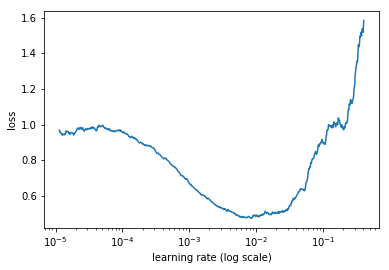

In [10]:
learner.lr_find()
learner.sched.plot()

In [11]:
λr = 2e-3

In [12]:
learner.fit(λr, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))


  8%|▊         | 79/1026 [00:08<01:44,  9.09it/s, loss=0.835]

  8%|▊         | 81/1026 [00:08<01:43,  9.10it/s, loss=0.825]

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed

[ 0.       0.40057  0.34499  0.82442]                          
[ 1.       0.35677  0.30631  0.85457]                          
[ 2.       0.35292  0.28403  0.86406]                          



In [13]:
%time learner.fit(λr, 3, cycle_len=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

[ 0.       0.33354  0.26675  0.87767]                          
[ 1.       0.32525  0.25844  0.88412]                          
[ 2.       0.31892  0.24172  0.89664]                          
[ 3.       0.29591  0.23781  0.90078]                          
[ 4.       0.30765  0.22929  0.90674]                          
[ 5.       0.29556  0.227    0.90674]                          

CPU times: user 31min 53s, sys: 3min 54s, total: 35min 47s
Wall time: 12min 54s


In [14]:
learner.save('100')

In [15]:
%time learner.fit(λr, 3, cycle_len=2, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=14), HTML(value='')))

[ 0.       0.30655  0.224    0.90382]                          
[ 1.       0.29098  0.22193  0.90965]                          
[ 2.       0.26844  0.21412  0.91221]                          
[ 3.       0.26111  0.21233  0.91634]                          
[ 4.       0.26798  0.20129  0.91464]                          
[ 5.       0.26162  0.2063   0.9189 ]                          
[ 6.       0.26926  0.20507  0.90978]                          
[ 7.       0.26509  0.20278  0.91148]                          
[ 8.       0.25779  0.18544  0.92558]                          
[ 9.       0.23394  0.18239  0.9268 ]                          
[ 10.        0.24376   0.18494   0.92449]                      
[ 11.        0.2402    0.18218   0.92583]                      
[ 12.        0.24941   0.1784    0.92498]                      
[ 13.        0.25138   0.18083   0.92814]                      

CPU times: user 1h 13min 54s, sys: 9min 13s, total: 1h 23min 7s
Wall time: 30min 15s


In [16]:
learner.save('100')

In [17]:
data = ImageClassifierData.from_csv(PATH, 'train', label_csv, bs=16, tfms=tfms,
                                    suffix='.jpg', val_idxs=val_idxs, num_workers=8)
learner.set_data(data)
λr = λr/2 # lowering learning rate due to lower batch size

In [19]:
λrs = [λr/1e2, λr/1e1, λr]
learner.unfreeze()

In [20]:
# testing GPU mem usage & time ## 1890-3006/3017 @ size=100
%time learner.fit(λrs, 1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.27783  0.20637  0.92373]                          

CPU times: user 9min 18s, sys: 2min 32s, total: 11min 51s
Wall time: 8min 2s


In [21]:
learner.save('100_uf')

In [23]:
learner.fit(λrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.22614  0.15489  0.94189]                          
[ 1.       0.19981  0.10811  0.95663]                          
[ 2.       0.15412  0.10415  0.95785]                          
[ 3.       0.15563  0.0907   0.96357]                          
[ 4.       0.134    0.07376  0.97234]                          
[ 5.       0.13234  0.06936  0.97283]                           
[ 6.       0.10379  0.074    0.97234]                           



In [24]:
learner.save('100_uf')

In [27]:
size = 200
tfms = tfms_from_model(arch, size, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', label_csv, bs=16, tfms=tfms,
                                    suffix='.jpg', val_idxs=val_idxs, num_workers=8)
data.resize(int(size), 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [28]:
learner.set_data(data)

In [29]:
# forgot to refreeze Conv layers
learner.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 71%|███████   | 1452/2052 [03:42<01:31,  6.52it/s, loss=1.43] 

NameError: name 'learn' is not defined

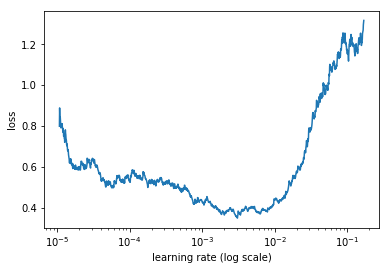

In [30]:
learner.sched.plot()

In [31]:
learner.freeze()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


  1%|          | 25/2052 [00:04<06:03,  5.58it/s, loss=0.601]
                                                              [A
  1%|▏         | 27/2052 [00:04<05:48,  5.81it/s, loss=0.598]

Exception in thread Thread-45:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-44:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set chang

 70%|███████   | 1437/2052 [03:40<01:34,  6.52it/s, loss=1.54] 


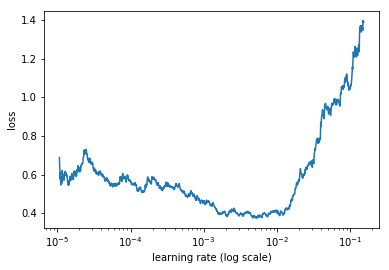

In [32]:
learner.lr_find()
learner.sched.plot()

In [34]:
learner.data.bs = 24
learner.data.bs

24

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 70%|███████   | 1440/2052 [03:40<01:33,  6.53it/s, loss=1.48] 

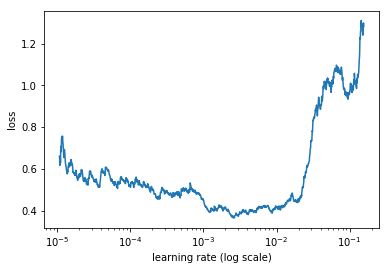

In [35]:
learner.lr_find()
learner.sched.plot()

In [38]:
λr = 9e-4

In [39]:
learner.fit(λr, 1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


  2%|▏         | 49/2052 [00:08<05:31,  6.04it/s, loss=0.576]

Exception in thread Thread-47:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-46:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set chang

[ 0.       0.33927  0.29921  0.87329]                          



In [40]:
learner.save('200')

In [41]:
%time learner.fit(λr, 3, cycle_len=2, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=14), HTML(value='')))

[ 0.       0.32853  0.26594  0.88682]                          
[ 1.       0.31546  0.26548  0.8884 ]                          
[ 2.       0.32817  0.25094  0.89815]                          
[ 3.       0.28611  0.23384  0.90814]                          
[ 4.       0.31058  0.22967  0.90911]                          
[ 5.       0.32728  0.22728  0.90899]                          
[ 6.       0.30243  0.2211   0.90948]                          
[ 7.       0.26272  0.21812  0.90863]                          
[ 8.       0.28752  0.2049   0.91898]                          
[ 9.       0.27126  0.20253  0.9191 ]                          
[ 10.        0.26256   0.19567   0.92203]                      
[ 11.        0.26871   0.19808   0.92495]                      
[ 12.        0.24498   0.19312   0.92678]                      
[ 13.        0.25224   0.1922    0.92556]                      

CPU times: user 2h 18min 52s, sys: 27min 58s, total: 2h 46min 51s
Wall time: 1h 29min 21s


In [42]:
learner.save('200')

In [44]:
λr

0.0009

In [46]:
λr /= 2
λrs = [λr/1e2, λr/1e1, λr]
learner.unfreeze()
learner.data.bs = 12

In [47]:
%time learner.fit(λrs, 1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.2549   0.18199  0.9258 ]                          

CPU times: user 18min 49s, sys: 7min 27s, total: 26min 17s
Wall time: 20min 47s


In [48]:
learner.save('200_uf')

In [49]:
%time learner.fit(λrs, 3, cycle_len=2, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=14), HTML(value='')))

[ 0.       0.20225  0.16333  0.93738]                          
[ 1.       0.21023  0.15333  0.94152]                          
[ 2.       0.19406  0.12813  0.95029]                          
[ 3.       0.1622   0.12327  0.95358]                          
[ 4.       0.20431  0.11177  0.95614]                          
[ 5.       0.16713  0.11503  0.95602]                          
[ 6.       0.14852  0.10456  0.96028]                          
[ 7.       0.1341   0.09728  0.96272]                          
[ 8.       0.11662  0.09491  0.9626 ]                          
[ 9.       0.13007  0.08162  0.96723]                          
[ 10.        0.10967   0.08696   0.96674]                      
[ 11.        0.126     0.07568   0.97149]                       
[ 12.        0.11396   0.08374   0.9665 ]                       
[ 13.        0.10556   0.08131   0.96918]                       

CPU times: user 4h 23min 42s, sys: 1h 44min 36s, total: 6h 8min 19s
Wall time: 4h 50min 34s


In [50]:
learner.save('200_uf_01')

### Troubleshooting Dead-Kernel

In [4]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from fastai_lin.imports import *
from fastai_lin.conv_learner import *
from fastai_lin.model import *
from fastai_lin.torch_imports import *

In [2]:
print(torch.__version__)

0.3.0.post4


In [5]:
PATH = 'data/'
label_csv = f'{PATH}labels.csv'

n = len(list(open(label_csv))) - 1
val_idxs = get_cv_idxs(n)

In [4]:
arch = resnet34

size = 400
tfms = tfms_from_model(arch, size, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', label_csv, bs=12, tfms=tfms,
                                    suffix='.jpg', val_idxs=val_idxs, num_workers=8)

In [5]:
#after dead kernel:
learner = ConvLearner.pretrained(arch, data)

In [6]:
learner.data.trn_ds.fnames[:10]

array(['train/000000-003707/000000.jpg', 'train/000000-003707/000002.jpg', 'train/000000-003707/000003.jpg',
       'train/000000-003707/000005.jpg', 'train/000000-003707/000006.jpg', 'train/000000-003707/000008.jpg',
       'train/000000-003707/000009.jpg', 'train/000000-003707/000010.jpg', 'train/000000-003707/000011.jpg',
       'train/000000-003707/000012.jpg'],
      dtype='<U30')

In [7]:
# learner.set_data(data)
learner.freeze()
learner.load('200_uf_01')

In [ ]:
%time learner.lr_find()
learner.sched.plot()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 24%|██▍       | 664/2736 [05:37<17:34,  1.97it/s, loss=0.375]

17 Dec 2017:

The issue comes from loading larger images. At 200x200, the ~41k image dataset was still under the 16&16 Mem/Swap limit of my workstation. At 400x400 this is breached, crashing every time around ~25%. The issue is also discussed in this [fastai thread](http://forums.fast.ai/t/anybody-working-on-cdiscount-kaggle-competition/8590/18) where I mention this as well.

An interesting note: memory usage increases *monotonically* until the crash. This suggests to me the issue is simple: there is simply something that never lets go of data after it grabs it. By monotonic, I mean mem-usage *never* decreases, even momentarily -- so it's likely not a more complex issue.

I don't yet know a solution because I don't know how the FastAI dataloader is working under the hood yet. I may find out, but for now, I think I can complete the first order of business: getting a G-LOC Detector Demo up on YouTube with just 200x200 images.

My model is severely overfitting -- discovered by the 'data exploration blah' section at bottom. My solution to this is specifying the validation set by video-subfolders.

The issue is it's important to have *different people* in the validation and training sets. Otherwise -- and in this case -- the model will learn to memorize their faces. This is why it was getting near perfect results on dataset-data, but failing pittifully on my own face. There is also the issue that 78% of the dataset are negatives, and only 22% positives, but I'm taking the path of least-work first.

Instead of sorting through ~41,000 images and splitting them into folders by person, I'm going to split them up by the subfolders I've already created: each containing images from a specific youtube video (see `urls.txt`).

If this works well enough I'll go with it. If not, then I have my checklist.

## Working on a custom by-videos validation set maker:

#### Initial Exploration & Developement

In [10]:
df = pd.read_csv(label_csv)

In [11]:
labels = df[df.columns[0]]

In [12]:
labels.head()

0    000000-003707/000000
1    000000-003707/000001
2    000000-003707/000002
3    000000-003707/000003
4    000000-003707/000004
Name: id, dtype: object

In [19]:
labels = df[df.columns[0]].as_matrix(); labels

array(['000000-003707/000000', '000000-003707/000001', '000000-003707/000002', ..., '047591-049519/049517',
       '047591-049519/049518', '047591-049519/049519'], dtype=object)

In [21]:
# len(labels[0].split('/')[0])

13

In [26]:
np.unique([λ.split('/')[0] for λ in labels])

array(['000000-003707', '003708-004400', '004401-005167', '005556-009150', '009151-009698', '009699-011843',
       '012504-016609', '016995-019955', '020058-021899', '023924-025482', '025551-027330', '027377-029118',
       '029565-032741', '033690-036023', '036894-037531', '038003-041290', '041950-042287', '042599-044710',
       '045006-046776', '047591-049519'],
      dtype='<U13')

In [31]:
x = np.unique([λ.split('/')[0] for λ in labels]); x.shape, x

((20,),
 array(['000000-003707', '003708-004400', '004401-005167', '005556-009150', '009151-009698', '009699-011843',
        '012504-016609', '016995-019955', '020058-021899', '023924-025482', '025551-027330', '027377-029118',
        '029565-032741', '033690-036023', '036894-037531', '038003-041290', '041950-042287', '042599-044710',
        '045006-046776', '047591-049519'],
       dtype='<U13'))

In [32]:
len(x)

20

20 is indeed how many video-urls I have. Good.

In [33]:
subfolders = np.unique([λ.split('/')[0] for λ in labels])

In [38]:
for folder in subfolders:
    print(f'{folder}: {len(os.listdir(PATH+"train/"+folder))}')

000000-003707: 3708
003708-004400: 693
004401-005167: 767
005556-009150: 3595
009151-009698: 548
009699-011843: 2145
012504-016609: 4106
016995-019955: 2961
020058-021899: 1842
023924-025482: 1559
025551-027330: 1780
027377-029118: 1742
029565-032741: 3177
033690-036023: 2334
036894-037531: 638
038003-041290: 3288
041950-042287: 338
042599-044710: 2112
045006-046776: 1771
047591-049519: 1929


Okay, this doesn't look to bad by eye. Let's get a bit numerical with this:

In [127]:
counts = [len(os.listdir(PATH+"train/"+folder)) for folder in subfolders]; counts[:13]

[3708, 693, 767, 3595, 548, 2145, 4106, 2961, 1842, 1559, 1780, 1742, 3177]

In [59]:
np.mean(counts), np.std(counts)

(2051.6500000000001, 1102.3182514591692)

In [60]:
# normalized standard deviation
np.std(counts)/np.mean(counts)

0.53728377230968694

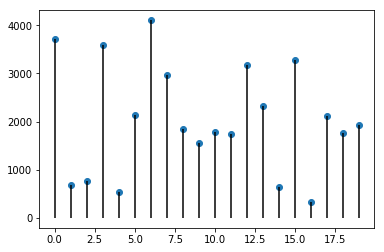

In [68]:
# plt.bar([i for i in range(len(counts))], counts)
# plt.gca().set_ylim([0,])
plt.scatter([i for i in range(len(counts))], counts)
plt.vlines(np.arange(len(counts)), 0, counts)

Okay so this deffinitely isn't great. So.. I should specify a target validation set proportion (say, 20%), give that some leeway, and write a function to pick a random set of subfolders that satisfies that. Right.

---

Hmm, maybe if I do this well enough I can submit it to fastai as a PR. Neat.

In [71]:
len(labels)

41033

In [86]:
np.where(labels[:len(subfolders[0])] == subfolders[0])

(array([], dtype=int64),)

In [81]:
labels[0]

'000000-003707/000000'

In [83]:
len(subfolders[0])

13

In [85]:
labels[0][:len(subfolders[0])]

'000000-003707'

In [94]:
len(np.where([λ[:len(subfolders[0])] == subfolders[0] for λ in labels])[0])

3708

Or instead of this horrible way of building an array each time... I could just look at the numbered subfolders... (this won't generalize to other datasets, but I can write that in if I'm doing a Pull Request).

In [95]:
subfolders[0]

'000000-003707'

In [99]:
a,b = subfolders[0].split('-'); a, b = int(a), int(b); a, b

(0, 3707)

In [100]:
b - a

3707

But this is inclusive, stard & end index, so I have to add 1.

In [101]:
b - a + 1

3708

Getting Python [mapping](http://book.pythontips.com/en/latest/map_filter.html) to work:

In [110]:
a,b = subfolders[0].split('-')
y = [a,b]
y = list(map(lambda x: int(x), y)); y

[0, 3707]

In [112]:
a,b = subfolders[0].split('-')
a,b = list(map(lambda x: int(x), (a,b))); a,b

(0, 3707)

This will work.

In [113]:
counts

[3708,
 693,
 767,
 3595,
 548,
 2145,
 4106,
 2961,
 1842,
 1559,
 1780,
 1742,
 3177,
 2334,
 638,
 3288,
 338,
 2112,
 1771,
 1929]

In [115]:
counts_test = []
for folder in subfolders:
    a, b = list(map(lambda x: int(x), folder.split('-')))
    counts_test.append(b-a+1)

In [116]:
counts_test

[3708,
 693,
 767,
 3595,
 548,
 2145,
 4106,
 2961,
 1842,
 1559,
 1780,
 1742,
 3177,
 2334,
 638,
 3288,
 338,
 2112,
 1771,
 1929]

In [122]:
sum(counts)

41033

In [123]:
.2 * sum(counts)

8206.6

In [131]:
sorted_counts = np.sort(counts); sorted_counts

array([ 338,  548,  638,  693,  767, 1559, 1742, 1771, 1780, 1842, 1929, 2112, 2145, 2334, 2961, 3177, 3288,
       3595, 3708, 4106])

In [133]:
sum(sorted_counts[:10])

11678

In [118]:
counts == counts_test

True

Sweet. Now to get the last part of this function working; the target threshold permutation thing.

Okay here's what I want: take a random handful of subfolders that total data within the threshold. I want more than 1 subfolder. I don't know about an upper-limit on validation subfolders used for now.

In [135]:
val_pct = 0.2 # 20%
threshold = 0.05 # ±5%
total = len(labels) # 41033

In [283]:
??get_cv_idxs

In [138]:
valfolder_idxs = np.random.permutation(len(subfolders) - 1)

Testing two different ways to write this part of the function:

In [257]:
def v1():
    idx = 0
    val_total = 0
    while val_total < len(labels)*(val_pct+threshold):
        idx += 1
        val_total = sum(np.asarray(counts_test)[valfolder_idxs[:idx]])
#         val_total = sum([counts_test[vidx] for vidx in valfolder_idxs[:idx]])
#         val_total = sum(counts_test[:valfolder_idxs[idx]])

    if val_total > len(labels)*(val_pct+threshold):
        idx -= 1
        val_total = sum(np.asarray(counts_test)[valfolder_idxs[:idx]]) # about 68 μs
#         val_total = sum([counts_test[vidx] for vidx in valfolder_idxs[:idx]]) # about 48 μs
#         val_total = sum(:counts_test[valfolder_idxs[idx]]) # about 4 μs but wrong

    if val_total < len(labels)*(val_pct-threshold):
        print("oh shit")

def v2():
    idx = -1
    val_total = 0
    while val_total < len(labels)*(val_pct+threshold):
        idx += 1
        val_total += counts_test[valfolder_idxs[idx]] # about 8 μs
    # lose last idx: just over threshold
    if val_total > len(labels)*(val_pct+threshold):
        val_total -= counts_test[valfolder_idxs[idx]]
        idx -= 1

    # re-shuffle: under threshold
    if val_total < len(labels)*(val_pct-threshold):
        print("oh shit")

In [301]:
n = 15
np.random.seed(0)
print(np.random.permutation(n))
print(np.random.permutation(n))

[ 1  6  8  9 14  4  2 13 10  7 11  3  0  5 12]
[ 2  4  3 13 11  0 10  9  5 14  8 12  7  6  1]


In [260]:
%time for i in range(1000): v1()

CPU times: user 68 ms, sys: 0 ns, total: 68 ms
Wall time: 67.2 ms


In [261]:
%time for i in range(1000): v2()

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 7.76 ms


I'll just go with the second method and remember to add 1 to the index when specifying the validation indices afterwards. When I find a faster way to implement v1 I'll rewrite that. Then again.. at *8 μs* what am I really complaining about? Hey I like a well-tuned machine.

In [262]:
idx = -1
val_total = 0
while val_total < len(labels)*(val_pct+threshold):
    idx += 1
    val_total += counts_test[valfolder_idxs[idx]] # about 8 μs
# lose last idx: just over threshold
if val_total > len(labels)*(val_pct+threshold):
    val_total -= counts_test[valfolder_idxs[idx]]
    idx -= 1

# re-shuffle: under threshold
if val_total < len(labels)*(val_pct-threshold):
    print("oh shit")

In [265]:
val_total, idx, f'{np.round(val_total/len(labels),2)}%'

(9811, 6, '0.24%')

In [267]:
valfolder_idxs

array([ 5, 16,  2,  4,  3, 10, 14, 11, 18, 15, 12,  7,  6,  0, 13, 17,  9,  1,  8])

In [275]:
temp = 0
for i in range(idx+1):
    temp += counts_test[valfolder_idxs[i]]
    print(temp)

2145
2483
3250
3798
7393
9173
9811


So make sure to add 1 to `idx`

In [277]:
temp_idxs = valfolder_idxs[:idx+1]; temp_idxs

array([ 5, 16,  2,  4,  3, 10, 14])

In [278]:
temp = 0
for i in temp_idxs:
    temp += counts_test[i]
    print(temp)

2145
2483
3250
3798
7393
9173
9811


Okeydoke. Got it working right.

In [280]:
valfolder_idxs = valfolder_idxs[:idx+1]

Next we get the raw indices that correspond to the data in those validation subfolders, and that'll be passed into the FastAI dataloader.

Two ways I can think of doing this are:
1. Build one big array mapping each filename to an index number & use that
2. Use the valfolder filenames to lookup in the dataframe, and pull their indices

I'll test both for speed.

Wait... my subfolders are start index to end index... so I can just use that..

In [302]:
labels

array(['000000-003707/000000', '000000-003707/000001', '000000-003707/000002', ..., '047591-049519/049517',
       '047591-049519/049518', '047591-049519/049519'], dtype=object)

In [303]:
subfolders

array(['000000-003707', '003708-004400', '004401-005167', '005556-009150', '009151-009698', '009699-011843',
       '012504-016609', '016995-019955', '020058-021899', '023924-025482', '025551-027330', '027377-029118',
       '029565-032741', '033690-036023', '036894-037531', '038003-041290', '041950-042287', '042599-044710',
       '045006-046776', '047591-049519'],
      dtype='<U13')

In [304]:
valfolder_idxs

array([ 5, 16,  2,  4,  3, 10, 14])

In [306]:
valfolders = subfolders[valfolder_idxs]; valfolders

array(['009699-011843', '041950-042287', '004401-005167', '009151-009698', '005556-009150', '025551-027330',
       '036894-037531'],
      dtype='<U13')

In [310]:
# Method 3: use a 'subtraction index'
subfolders

array(['000000-003707', '003708-004400', '004401-005167', '005556-009150', '009151-009698', '009699-011843',
       '012504-016609', '016995-019955', '020058-021899', '023924-025482', '025551-027330', '027377-029118',
       '029565-032741', '033690-036023', '036894-037531', '038003-041290', '041950-042287', '042599-044710',
       '045006-046776', '047591-049519'],
      dtype='<U13')

In [340]:
# each index tells how many to subtract BEFORE that subfolder index.
subtract_idx = np.zeros(len(subfolders))
for idx,folder in enumerate(subfolders):
    if idx == 0:
        # start with the beginning
        subtract_idx[idx] = int(subfolders[idx].split('-')[0])
    else:
        # add the previous + the difference
        subtract_idx[idx] = subtract_idx[idx-1] + \
                                int(subfolders[idx].split('-')[0]) - \
                                int(subfolders[idx-1].split('-')[1])

In [341]:
subtract_idx

array([    0.,     1.,     2.,   391.,   392.,   393.,  1054.,  1440.,  1543.,  3568.,  3637.,  3684.,  4131.,
        5080.,  5951.,  6423.,  7083.,  7395.,  7691.,  8506.])

If this works right, `int(labels[-1].split('/')[1]) - subtract_idx` should equal `len(labels)`

In [342]:
labels[-1]

'047591-049519/049519'

In [347]:
int(labels[-1].split('/')[1]) - subtract_idx[-1] == len(labels)

False

In [349]:
int(labels[-1].split('/')[1]) - subtract_idx[-1]

41013.0

In [350]:
len(labels)

41033

In [352]:
sum(counts)

41033

In [353]:
subfolders

array(['000000-003707', '003708-004400', '004401-005167', '005556-009150', '009151-009698', '009699-011843',
       '012504-016609', '016995-019955', '020058-021899', '023924-025482', '025551-027330', '027377-029118',
       '029565-032741', '033690-036023', '036894-037531', '038003-041290', '041950-042287', '042599-044710',
       '045006-046776', '047591-049519'],
      dtype='<U13')

In [379]:
temp = 0
for i in range(1, len(subfolders)):
    temp += int(subfolders[i].split('-')[0]) - int(subfolders[i-1].split('-')[1]) - 1
    print(temp)

0
0
388
388
388
1048
1433
1535
3559
3627
3673
4119
5067
5937
6408
7067
7378
7673
8487


In [361]:
int(subfolders[-1].split('-')[-1])

49519

In [365]:
49519 - 8506

41013

In [373]:
49519 - 8487

41032

Oh wait, fuck yes, this works because the file names are zero-indexed. Phew. Okay, good.

Up above in the calculating-differences loop, I was accidentally adding 1 between each subfolder, and that even covered up the off-by-one by subtracting 1 time, right at the beginning -- or so.

So now to edite the subtract_idxs loop a bit:

In [366]:
subfolders

array(['000000-003707', '003708-004400', '004401-005167', '005556-009150', '009151-009698', '009699-011843',
       '012504-016609', '016995-019955', '020058-021899', '023924-025482', '025551-027330', '027377-029118',
       '029565-032741', '033690-036023', '036894-037531', '038003-041290', '041950-042287', '042599-044710',
       '045006-046776', '047591-049519'],
      dtype='<U13')

In [380]:
# each index tells how many to subtract BEFORE that subfolder index.
subtract_idx = np.zeros(len(subfolders))
for idx,folder in enumerate(subfolders):
    if idx == 0:
        # start with the beginning
        subtract_idx[idx] = int(subfolders[idx].split('-')[0])
    else:
        # add the previous + the difference
        subtract_idx[idx] = subtract_idx[idx-1] + \
                                int(subfolders[idx].split('-')[0]) - \
                                int(subfolders[idx-1].split('-')[1]) - 1
# 8487 is the final magic number we're looking for
subtract_idx

array([    0.,     0.,     0.,   388.,   388.,   388.,  1048.,  1433.,  1535.,  3559.,  3627.,  3673.,  4119.,
        5067.,  5937.,  6408.,  7067.,  7378.,  7673.,  8487.])

Now we can use the subtraction index to build our validation index array, to feed into the FastAI dataloader.

In [383]:
valfolder_idxs, valfolders, subtract_idx, subfolders, len(labels)

(array([ 5, 16,  2,  4,  3, 10, 14]),
 array(['009699-011843', '041950-042287', '004401-005167', '009151-009698', '005556-009150', '025551-027330',
        '036894-037531'],
       dtype='<U13'),
 array([    0.,     0.,     0.,   388.,   388.,   388.,  1048.,  1433.,  1535.,  3559.,  3627.,  3673.,  4119.,
         5067.,  5937.,  6408.,  7067.,  7378.,  7673.,  8487.]),
 array(['000000-003707', '003708-004400', '004401-005167', '005556-009150', '009151-009698', '009699-011843',
        '012504-016609', '016995-019955', '020058-021899', '023924-025482', '025551-027330', '027377-029118',
        '029565-032741', '033690-036023', '036894-037531', '038003-041290', '041950-042287', '042599-044710',
        '045006-046776', '047591-049519'],
       dtype='<U13'),
 41033)

In [390]:
temp = []
temp.extend([1,2]); temp
temp.extend(np.arange(5)); temp
temp.append(np.arange(5)); temp

[1, 2, 0, 1, 2, 3, 4, array([0, 1, 2, 3, 4])]

In [403]:
temp = 0
for v in valfolders:
    a,b = list(map(lambda x: int(x), v.split('-')))
    temp += b-a+1
temp

9811

That's the next magic number. `9811` is the sum of all `valfolder_idxs` in `counts`. IE: the size of the validation set. The length of `val_idxs` **must** be that number for this process to be valid.

In [383]:
valfolder_idxs, valfolders, subtract_idx, subfolders, len(labels)

(array([ 5, 16,  2,  4,  3, 10, 14]),
 array(['009699-011843', '041950-042287', '004401-005167', '009151-009698', '005556-009150', '025551-027330',
        '036894-037531'],
       dtype='<U13'),
 array([    0.,     0.,     0.,   388.,   388.,   388.,  1048.,  1433.,  1535.,  3559.,  3627.,  3673.,  4119.,
         5067.,  5937.,  6408.,  7067.,  7378.,  7673.,  8487.]),
 array(['000000-003707', '003708-004400', '004401-005167', '005556-009150', '009151-009698', '009699-011843',
        '012504-016609', '016995-019955', '020058-021899', '023924-025482', '025551-027330', '027377-029118',
        '029565-032741', '033690-036023', '036894-037531', '038003-041290', '041950-042287', '042599-044710',
        '045006-046776', '047591-049519'],
       dtype='<U13'),
 41033)

In [407]:
val_idxs = []
for idx,vdx in enumerate(valfolder_idxs):
    start,end = list(map(lambda x: int(x), valfolders[idx].split('-')))
    start -= subtract_idx[vdx]
    end   -= subtract_idx[vdx]
    val_idxs.extend(np.arange(start, end+1))
len(val_idxs)

9811

There we have it. Checking `np.arange(start, end)`'s behavior, below you see that it's end-exclusive, so adding 1 fixes the off-by-one issue, adding 7 for 7 validation subfolders.

In [409]:
np.arange(0,1), len(valfolders)

(array([0]), 7)

#### Testing Validation-By-Subfolder Function:

Now to turn that into a function and see if it works. Unfortunately I didn't set a random seed earlier above, meaning I'll have to redo all steps above in order to check them against the function.

In [423]:
# Wayne Nixalo - 2017-Dec-18 01:49
# NOTE: this function makes some very specific assumptions I've not documented yet!

def set_cv_idxs(val_pct=0.2, thresh=0.05, seed=None):
    # set random seed if specfd
    if seed != None: np.random.seed(seed)

    # safety check
    assert val_pct < 1, "Validation Percent must be below 100: %f" % val_pct

    # get labels csv
    df = pd.read_csv(label_csv)
    labels = df[df.columns[0]].as_matrix()

    # build subfolders array
    subfolders = np.unique([λ.split('/')[0] for λ in labels])

    # get total number of data
    total = len(labels)

    # get array of total data each subfolder
    counts = []
    for folder in subfolders:
        a,b = list(map(lambda x: int(x), folder.split('-')))
        counts.append(b-a+1)

    target_max = total * (val_pct+thresh)
    target_min = total * (val_pct-thresh)
    val_total  = 0
    idx        = -1

    # try permutations until above min threshold    NOTE: assertion above aimed at making this safe
    while val_total < target_min:
        # shuffle indices
        valfolder_idxs = np.random.permutation(len(subfolders)-1)

        while val_total < target_max:
            idx += 1
            val_total += counts[valfolder_idxs[idx]]
        # just over threshold: lose last idx
        if val_total > target_max:
            val_total -= counts[valfolder_idxs[idx]]
            idx -= 1

    # validation subfolders & indices
    valfolder_idxs = valfolder_idxs[:idx+1]
    valfolders = subfolders[valfolder_idxs]

    # build subtraction index to match validation-index format of FastAI dataloader
    subtract_idx = np.zeros(len(subfolders))
    for idx, folder in enumerate(subfolders):
        if idx == 0:
            # start with beginning
            subtract_idx[idx] = int(subfolders[idx].split('-')[0])
        else:
            # add the previous + the difference
            subtract_idx[idx] = subtract_idx[idx-1] + \
                                    int(subfolders[idx].split('-')[0]) - \
                                    int(subfolders[idx-1].split('-')[1]) - 1

    # build final validation index list
    val_idxs = []
    for idx, vdx in enumerate(valfolder_idxs):
        start, end = list(map(lambda x: int(x), valfolders[idx].split('-')))
        start -= subtract_idx[vdx]
        end   -= subtract_idx[vdx]
        val_idxs.extend(np.arange(start, end+1).astype(np.int32))

    return val_idxs

In [424]:
check_val_idxs = set_cv_idxs(val_pct=0.2, thresh=0.05, seed=0)

In [426]:
# that's hillarious, I had floating-point 'indices'; fix by set: .astype(np.int32)
len(check_val_idxs), check_val_idxs[:10]

(7062, [21924, 21925, 21926, 21927, 21928, 21929, 21930, 21931, 21932, 21933])

#### Testing against 'Manual' Validation-By-Subfolder Code:

In [429]:
df = pd.read_csv(label_csv)
labels = df[df.columns[0]].as_matrix()
subfolders = np.unique([λ.split('/')[0] for λ in labels])
counts = [len(os.listdir(PATH+"train/"+folder)) for folder in subfolders]

counts_test = []
for folder in subfolders:
    a, b = list(map(lambda x: int(x), folder.split('-')))
    counts_test.append(b-a+1)

sorted_counts = np.sort(counts)

val_pct = 0.2 # 20%
threshold = 0.05 # ±5%
total = len(labels) # 41033

np.random.seed(0)
valfolder_idxs = np.random.permutation(len(subfolders) - 1)

idx = -1
val_total = 0
while val_total < len(labels)*(val_pct+threshold):
    idx += 1
    val_total += counts_test[valfolder_idxs[idx]] # about 8 μs
# lose last idx: just over threshold
if val_total > len(labels)*(val_pct+threshold):
    val_total -= counts_test[valfolder_idxs[idx]]
    idx -= 1

# re-shuffle: under threshold
if val_total < len(labels)*(val_pct-threshold):
    print("oh shit")

valfolder_idxs = valfolder_idxs[:idx+1]
valfolders = subfolders[valfolder_idxs]

# each index tells how many to subtract BEFORE that subfolder index.
subtract_idx = np.zeros(len(subfolders))
for idx,folder in enumerate(subfolders):
    if idx == 0:
        # start with the beginning
        subtract_idx[idx] = int(subfolders[idx].split('-')[0])
    else:
        # add the previous + the difference
        subtract_idx[idx] = subtract_idx[idx-1] + \
                                int(subfolders[idx].split('-')[0]) - \
                                int(subfolders[idx-1].split('-')[1]) - 1

val_idxs = []
for idx,vdx in enumerate(valfolder_idxs):
    start,end = list(map(lambda x: int(x), valfolders[idx].split('-')))
    start -= subtract_idx[vdx]
    end   -= subtract_idx[vdx]
    val_idxs.extend(np.arange(start, end+1).astype(np.int32))

print(len(val_idxs), val_idxs[:10])

7062 [21924, 21925, 21926, 21927, 21928, 21929, 21930, 21931, 21932, 21933]


Oh My God I love the world. Okay. Great. Looks like it works. Now to do another numerical check.

In [431]:
False in np.isclose(check_val_idxs, val_idxs)

False

#### Remarks

There you have it. The function works as advertised. There are a number of changes I'll need to make to turn this into a generalized Pull Request to the FastAI Deep Learning Library, but I'm very happy with building this tonight.

As it stands, `subfolder_val_loader()` takes an ordered list of file-IDs broken into file-ID-range named subfolders, and returns a list of random indices after accounting for any gaps between subfolders by subtracting the (accumulating) differences. This is returned as an array ready to be passed as a parameter into the FastAI dataloader.

Fuck Yeah.

---

I may rename the function, but that's a good night's work so far. I may even go crazy and try to use this and put my workstation to work for the night. Ooo, Vikings started their season! Well alrighty then.

-- 18 Dec 2017
Wayne Nixalo

## Testing the model on unseen data, breaking up training dataset into subfolders, misc

In [11]:
temp = glob('data/train/*/')

In [12]:
temp

['data/train/042599-044710/',
 'data/train/000000-003707/',
 'data/train/036894-037531/',
 'data/train/016995-019955/',
 'data/train/023924-025482/',
 'data/train/038003-041290/',
 'data/train/012504-016609/',
 'data/train/033690-036023/',
 'data/train/009699-011843/',
 'data/train/005556-009150/',
 'data/train/029565-032741/',
 'data/train/045006-046776/',
 'data/train/027377-029118/',
 'data/train/025551-027330/',
 'data/train/009151-009698/',
 'data/train/041950-042287/',
 'data/train/004401-005167/',
 'data/train/003708-004400/',
 'data/train/047591-049519/',
 'data/train/020058-021899/']

In [13]:
t = temp[0]; t

'data/train/042599-044710/'

In [14]:
t.split('/')

['data', 'train', '042599-044710', '']

'data/train/042599-044710/'

In [235]:
dirnames = glob('data/train/*/')
for i,d in enumerate(dirnames):
    dirnames[i] = d.split('/')[-2]
#     dirnames[i] = d.split('/')[-2].split('-')[1]
dirnames.sort()
# dirnames

In [236]:
dirnames

['000000-003707',
 '003708-004400',
 '004401-005167',
 '005556-009150',
 '009151-009698',
 '009699-011843',
 '012504-016609',
 '016995-019955',
 '020058-021899',
 '023924-025482',
 '025551-027330',
 '027377-029118',
 '029565-032741',
 '033690-036023',
 '036894-037531',
 '038003-041290',
 '041950-042287',
 '042599-044710',
 '045006-046776',
 '047591-049519']

In [45]:
df = pd.read_csv('data/labels.csv')

In [40]:
df.columns[0]

'id'

In [41]:
type(df[key][0])

numpy.int64

In [42]:
df.head()

,id,gloc
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [226]:
df = pd.read_csv('data/labels.csv')

In [232]:
key = df.columns[0]
temp =df[key].as_matrix()

In [231]:
temp[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [244]:
dirnames = glob('data/train/*/')
for i,d in enumerate(dirnames):
    dirnames[i] = d.split('/')[-2]
dirnames.sort()

df = pd.read_csv('data/labels.csv')
key = df.columns[0]
idx = 0
newcol = []

for i,e in enumerate(df[key]):
    if int(e) > int(dirnames[idx].split('-')[1]):
        idx += 1
    newcol.append(dirnames[idx] + '/' + f'{e:0=6d}')

newdf = pd.DataFrame(newcol, columns=['id'])
newdf.insert(1, 'gloc', df['gloc'])

newdf.to_csv('data/labels.csv')

In [246]:
newcol[:10]

['000000-003707/000000',
 '000000-003707/000001',
 '000000-003707/000002',
 '000000-003707/000003',
 '000000-003707/000004',
 '000000-003707/000005',
 '000000-003707/000006',
 '000000-003707/000007',
 '000000-003707/000008',
 '000000-003707/000009']

In [249]:
df2 = pd.DataFrame(newcol, columns=['id'])
df2.insert(1, 'gloc', df['gloc'])

In [264]:
np.unique(df2['gloc'], return_counts=True)

(array([0, 1]), array([31961,  9072]))

In [265]:
df2.head()

,id,gloc
0,000000-003707/000000,0
1,000000-003707/000001,0
2,000000-003707/000002,0
3,000000-003707/000003,0
4,000000-003707/000004,0


In [247]:
df['gloc'][:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: gloc, dtype: int64

In [22]:
%pwd

'/home/wnixalo/Aersu/GLOC'

In [7]:
os.listdir(PATH)

['labels_27377-29118.csv',
 'labels_0-3707.csv',
 'labels_5556-9150.csv',
 'labels_47591-49519.csv',
 'labels_9151-9698.csv',
 'tmp',
 'labels_12504-16609.csv',
 'labels_33690-36023.csv',
 'labels_29565-32741.csv',
 'labels_9699-11843.csv',
 'labels_16995-19955.csv',
 'train',
 'labels_36894-37531.csv',
 'labels.csv',
 'labels_23924-25482.csv',
 'labels_4401-5167.csv',
 'labels_42599-44710.csv',
 'labels_41950-42287.csv',
 'labels_45006-46776.csv',
 'models',
 'labels_38003-41290.csv',
 'labels_25551-27330.csv',
 'labels_20058-21899.csv',
 'labels_3708-4400.csv',
 'train.zip']

In [7]:
tzp = PATH + 'test_z/'

In [10]:
%ls $tzp

Screenshot 2017-12-14 19.11.51.png  Screenshot 2017-12-14 19.12.22.png
Screenshot 2017-12-14 19.12.04.png  Screenshot 2017-12-14 19.12.29.png
Screenshot 2017-12-14 19.12.13.png  Screenshot 2017-12-14 19.12.36.png
Screenshot 2017-12-14 19.12.19.png  Screenshot 2017-12-14 19.12.59.png


In [14]:
imglist = glob(tzp + '*')

In [15]:
imglist

['data/test_z/Screenshot 2017-12-14 19.12.04.png',
 'data/test_z/Screenshot 2017-12-14 19.12.22.png',
 'data/test_z/Screenshot 2017-12-14 19.12.29.png',
 'data/test_z/Screenshot 2017-12-14 19.12.36.png',
 'data/test_z/Screenshot 2017-12-14 19.12.59.png',
 'data/test_z/Screenshot 2017-12-14 19.12.13.png',
 'data/test_z/Screenshot 2017-12-14 19.11.51.png',
 'data/test_z/Screenshot 2017-12-14 19.12.19.png']

In [20]:
img = Image.open(imglist[0])

In [25]:
img = np.asarray(img)

In [26]:
img.shape

(1242, 816, 4)

In [27]:
imglist

['data/test_z/Screenshot 2017-12-14 19.12.04.png',
 'data/test_z/Screenshot 2017-12-14 19.12.22.png',
 'data/test_z/Screenshot 2017-12-14 19.12.29.png',
 'data/test_z/Screenshot 2017-12-14 19.12.36.png',
 'data/test_z/Screenshot 2017-12-14 19.12.59.png',
 'data/test_z/Screenshot 2017-12-14 19.12.13.png',
 'data/test_z/Screenshot 2017-12-14 19.11.51.png',
 'data/test_z/Screenshot 2017-12-14 19.12.19.png']

In [45]:
imglist = glob(tzp + '*')

# convert all to jpg's
for impath in imglist:
    img = Image.open(impath)
    img = np.asarray(img)
    tfx = 400 / img.shape[1]
    tfy = 400 / img.shape[0]    
    img = cv2.resize(img, None, fx=tfx, fy=tfy)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(PATH + 'test_zjpg/' + impath.split('/')[2].split('.png')[0] + '.jpg', img)

In [33]:
tzpj = PATH + 'test_zjpg/'

In [36]:
%ls $tzpj

Screenshot 2017-12-14 19.11.51.jpg  Screenshot 2017-12-14 19.12.22.jpg
Screenshot 2017-12-14 19.12.04.jpg  Screenshot 2017-12-14 19.12.29.jpg
Screenshot 2017-12-14 19.12.13.jpg  Screenshot 2017-12-14 19.12.36.jpg
Screenshot 2017-12-14 19.12.19.jpg  Screenshot 2017-12-14 19.12.59.jpg


In [120]:
imglist = glob(tzpj+'*.jpg'); imglist

['data/test_zjpg/Screenshot 2017-12-14 19.12.19.jpg',
 'data/test_zjpg/Screenshot 2017-12-14 19.12.29.jpg',
 'data/test_zjpg/Screenshot 2017-12-14 19.12.36.jpg',
 'data/test_zjpg/Screenshot 2017-12-14 19.11.51.jpg',
 'data/test_zjpg/Screenshot 2017-12-14 19.12.04.jpg',
 'data/test_zjpg/Screenshot 2017-12-14 19.12.59.jpg',
 'data/test_zjpg/Screenshot 2017-12-14 19.12.13.jpg']

In [225]:
for impath in imglist:
    fig = plt.figure(figsize=(10,10))
    plt.imshow(plt.imread(impath))
#     fig = plt.figure(figsize=(10,10))
#     img = plt.imread(impath)
#     plt.imshow(img)

In [64]:
imglist[1]

'data/test_zjpg/Screenshot 2017-12-14 19.12.29.jpg'

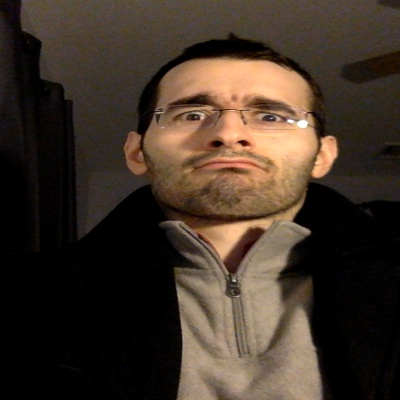

In [76]:
img = Image.open(imglist[4]); img

In [11]:
size = 200
tfms = tfms_from_model(arch, size, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', label_csv, bs=12, tfms=tfms,
                                    suffix='.jpg', val_idxs=val_idxs, num_workers=8,
                                    test_name='test_temp2')
learner = ConvLearner.pretrained(arch, data)
learner.set_data(data)
learner.load('200_uf')

In [12]:
learner.data.test_ds.fnames[:10]

['test_temp2/024356.jpg',
 'test_temp2/024615.jpg',
 'test_temp2/024602.jpg',
 'test_temp2/024361.jpg',
 'test_temp2/024372.jpg',
 'test_temp2/024362.jpg',
 'test_temp2/024612.jpg',
 'test_temp2/024607.jpg',
 'test_temp2/025476.jpg',
 'test_temp2/024367.jpg']

In [13]:
predictions, y = learner.TTA(is_test=True)

In [6]:
imglist = glob(PATH + 'test_temp2/' +'*.jpg'); imglist[:10]
# imglist = glob(PATH + 'test_zjpg/' +'*.jpg'); imglist[:10]

['data/test_temp2/024614.jpg',
 'data/test_temp2/024356.jpg',
 'data/test_temp2/024615.jpg',
 'data/test_temp2/024602.jpg',
 'data/test_temp2/024361.jpg',
 'data/test_temp2/024372.jpg',
 'data/test_temp2/024362.jpg',
 'data/test_temp2/024612.jpg',
 'data/test_temp2/024607.jpg',
 'data/test_temp2/025476.jpg']

In [14]:
predictions.shape

(5, 37, 2)

In [15]:
preds = np.mean(np.exp(predictions), 0)

In [221]:
preds

array([[ 0.95137,  0.04863],
       [ 0.95095,  0.04905],
       [ 0.99272,  0.00728],
       [ 0.98887,  0.01113],
       [ 0.93556,  0.06444],
       [ 0.91257,  0.08743]], dtype=float32)

In [ ]:
# plt.imshow(Image.open(imglist[2]))

In [175]:
learner.data.classes

['0', '1']

In [224]:
for i in range(1, len(imglist)):
    fig = plt.figure(figsize=(10,10))
    plt.title(f'{preds[i-1]} - GLOC Confidence: {np.round(preds[i-1][1]*100,2)}%')
    img = plt.imread(imglist[i])
    plt.imshow(img)

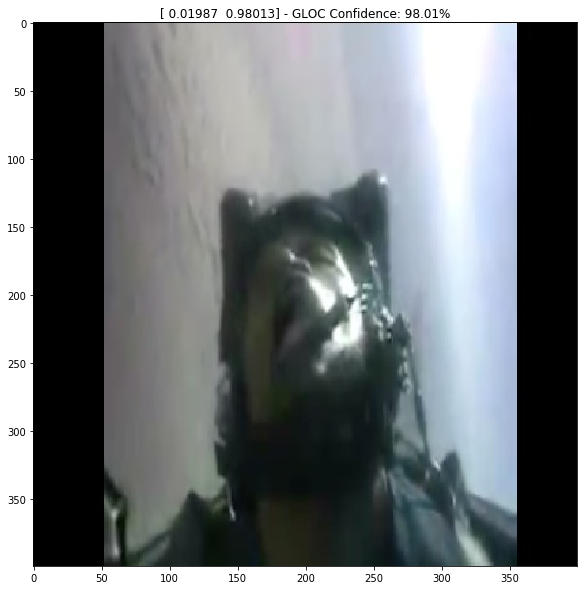

In [16]:
# for some reason the dataloader isn't taking in the first image in the test path
# for i in range(1, len(imglist)):
i = 6
fig = plt.figure(figsize=(10,10))
plt.title(f'{preds[i-1]} - GLOC Confidence: {np.round(preds[i-1][1]*100,2)}%')
img = plt.imread(imglist[i])
plt.imshow(img)

In [ ]:
# {024602..024617}.jpg  -- ['1']
# {024355..024372}.jpg  -- ['1']

In [ ]:
    f = plt.figure(figsize=figsize)
    if maintitle is not None: plt.suptitle(maintitle, fontsize=16)
    for i in range(len(imspaths)):
        sp = f.add_subplot(rows, ceildiv(len(imspaths), rows), i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        img = plt.imread(imspaths[i])
        plt.imshow(img)

In [11]:
img = Image.open(im)

# x & y transforms
tfx = 400 / w
tfy = 400 / h

# capture, resize, save screen
img = getScreen(bbox=bbox)
img = np.asarray(img)
img = cv2.resize(img, None, fx=tfx, fy=tfy)
cv2.imwrite(path+f'{idx:0=6d}.jpg', img)

<module 'cv2.cv2' from '/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/cv2/cv2.cpython-36m-x86_64-linux-gnu.so'>

In [179]:
df = pd.read_csv('data/labels.csv'); df.head()

,id,gloc
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [184]:
temp = np.unique(df['gloc'], return_counts=True);temp

(array([0, 1]), array([31961,  9072]))

In [192]:
dflen = len(df['gloc'])
a,b = temp[1][0] / dflen, temp[1][1] / dflen
np.round((a,b), 2)

array([ 0.78,  0.22])

In [189]:
len(df['gloc'])

41033

[How to visualize/display a data image in ‘torch.FloatTensor’ type](https://discuss.pytorch.org/t/how-to-visualize-display-a-data-image-in-torch-floattensor-type/7770)

[Plotting numpy arrays as images](https://matplotlib.org/users/image_tutorial.html#plotting-numpy-arrays-as-images)

[ython make RGB image from 3 float32 numpy arrays
](https://stackoverflow.com/questions/26918390/python-make-rgb-image-from-3-float32-numpy-arrays)

[How to create image from numpy float32 array?
](https://stackoverflow.com/questions/38867869/how-to-create-image-from-numpy-float32-array)